In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DATN/collected_data.csv')
dataset = data['maxtemp'].values
dataset = dataset.reshape(-1, 1)

In [3]:
data.head(10)

,date,temp,feelslike,mintemp,maxtemp,humidity,windspeed,winddeg,weatherid,weathermain,weatherdescription
0,1/1/2023,19.64,18.94,18.98,20.02,49,1.54,0,800,Clear,sky is clear
1,1/2/2023,18.05,17.27,17.18,20.02,52,3.10,20,800,Clear,sky is clear
2,1/3/2023,18.75,18.22,18.29,19.02,59,4.12,360,802,Clouds,scattered clouds
3,1/4/2023,20.54,20.11,20.13,21.02,56,2.10,60,803,Clouds,broken clouds
4,1/5/2023,19.67,19.57,19.15,20.02,72,2.60,40,803,Clouds,broken clouds
5,1/6/2023,23.04,22.52,22.85,24.02,43,6.20,10,800,Clear,sky is clear
6,1/7/2023,22.32,21.65,21.01,22.66,40,2.60,20,800,Clear,sky is clear
7,1/8/2023,22.93,22.64,21.01,23.40,52,2.10,280,800,Clear,sky is clear
8,1/9/2023,23.42,23.49,22.01,23.69,64,2.60,280,721,Haze,haze
9,1/10/2023,22.91,22.82,22.25,23.61,60,3.10,350,803,Clouds,broken clouds


In [4]:
data.isnull().sum()

,0
date,0
temp,0
feelslike,0
mintemp,0
maxtemp,0
humidity,0
windspeed,0
winddeg,0
weatherid,0
weathermain,0


In [5]:
columns_check= ['temp','feelslike','mintemp','maxtemp','humidity',
                'windspeed','winddeg','weatherid']

zero_rows = data[(data[columns_check] == 0).any(axis=1)]
sum_zero = len(zero_rows)

zero_location = zero_rows.index

display(zero_rows)
print("Tổng số dòng có dữ liệu bằng 0: ",sum_zero)

,date,temp,feelslike,mintemp,maxtemp,humidity,windspeed,winddeg,weatherid,weathermain,weatherdescription
0,1/1/2023,19.64,18.94,18.98,20.02,49,1.54,0,800,Clear,sky is clear
13,1/13/2023,24.90,25.25,24.13,25.56,69,1.54,0,802,Clouds,scattered clouds
21,1/21/2023,20.18,19.61,19.92,21.02,52,2.10,0,803,Clouds,broken clouds
25,1/25/2023,17.47,16.13,17.01,17.86,33,2.60,0,801,Clouds,few clouds
26,1/26/2023,17.90,17.50,16.01,18.56,67,1.03,0,804,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...
845,4/7/2025,23.10,23.76,22.02,23.37,88,1.03,0,701,Mist,mist
889,5/21/2025,33.48,40.48,33.02,34.23,70,3.09,0,803,Clouds,broken clouds
896,5/28/2025,30.00,36.04,29.02,30.60,74,1.54,0,500,Rain,light rain
898,5/30/2025,29.28,34.18,28.46,30.06,74,1.54,0,500,Rain,light rain


Tổng số dòng có dữ liệu bằng 0:  108


In [9]:
data_handle = data.copy()

median_values = data_handle[columns_check].median()
data_handle[columns_check] = data_handle[columns_check].replace(0, median_values)

rows_median = data_handle.loc[zero_location]
print("Dữ liệu sau khi đã xử lý:")
display(rows_median)

Dữ liệu sau khi đã xử lý:


,date,temp,feelslike,mintemp,maxtemp,humidity,windspeed,winddeg,weatherid,weathermain,weatherdescription
0,1/1/2023,19.64,18.94,18.98,20.02,49,1.54,110,800,Clear,sky is clear
13,1/13/2023,24.90,25.25,24.13,25.56,69,1.54,110,802,Clouds,scattered clouds
21,1/21/2023,20.18,19.61,19.92,21.02,52,2.10,110,803,Clouds,broken clouds
25,1/25/2023,17.47,16.13,17.01,17.86,33,2.60,110,801,Clouds,few clouds
26,1/26/2023,17.90,17.50,16.01,18.56,67,1.03,110,804,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...
845,4/7/2025,23.10,23.76,22.02,23.37,88,1.03,110,701,Mist,mist
889,5/21/2025,33.48,40.48,33.02,34.23,70,3.09,110,803,Clouds,broken clouds
896,5/28/2025,30.00,36.04,29.02,30.60,74,1.54,110,500,Rain,light rain
898,5/30/2025,29.28,34.18,28.46,30.06,74,1.54,110,500,Rain,light rain


In [10]:
data_handle.to_csv("/content/drive/MyDrive/DATN/data_pre.csv", index=False)
print("Dữ liệu xử lý đã được lưu vào file data_pre.csv")

Dữ liệu xử lý đã được lưu vào file data_pre.csv


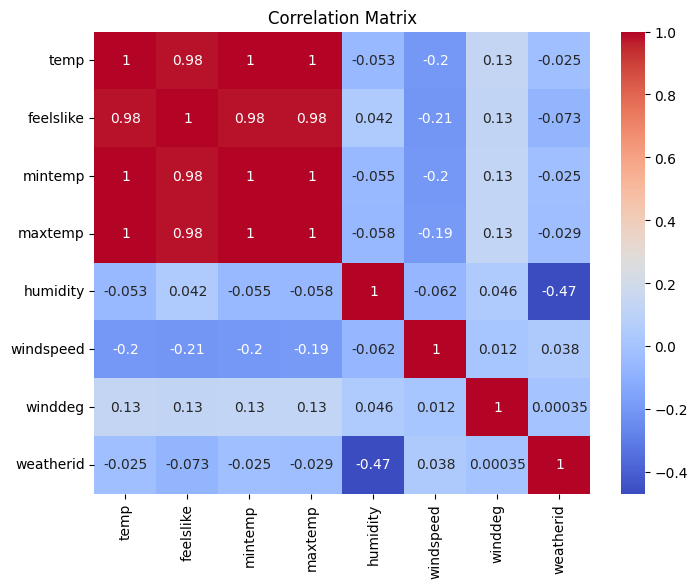

In [11]:
import seaborn as sb

data['date'] = pd.to_datetime(data['date'])
numeric_data = data.select_dtypes(include=np.number)

corr_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
prop_maxtemp = data[['maxtemp','mintemp','temp','feelslike']]
display(prop_maxtemp)

,maxtemp,mintemp,temp,feelslike
0,20.02,18.98,19.64,18.94
1,20.02,17.18,18.05,17.27
2,19.02,18.29,18.75,18.22
3,21.02,20.13,20.54,20.11
4,20.02,19.15,19.67,19.57
...,...,...,...,...
902,34.14,32.02,33.24,40.24
903,32.57,30.77,31.83,38.22
904,32.92,31.52,32.13,39.13
905,34.20,31.61,33.06,40.06


In [13]:
prop_mintemp = data[['mintemp','temp','maxtemp','feelslike']]
display(prop_mintemp)

,mintemp,temp,maxtemp,feelslike
0,18.98,19.64,20.02,18.94
1,17.18,18.05,20.02,17.27
2,18.29,18.75,19.02,18.22
3,20.13,20.54,21.02,20.11
4,19.15,19.67,20.02,19.57
...,...,...,...,...
902,32.02,33.24,34.14,40.24
903,30.77,31.83,32.57,38.22
904,31.52,32.13,32.92,39.13
905,31.61,33.06,34.20,40.06


In [14]:
scaler_maxtemp = MinMaxScaler()
scaler_maxtemp.fit(prop_maxtemp)

normal_maxtemp = scaler_maxtemp.transform(prop_maxtemp)
df_normal_maxtemp = pd.DataFrame(normal_maxtemp, columns=prop_maxtemp.columns)
display(df_normal_maxtemp)

,maxtemp,mintemp,temp,feelslike
0,0.311493,0.310242,0.315494,0.256978
1,0.311493,0.243203,0.255988,0.208921
2,0.274890,0.284544,0.282186,0.236259
3,0.348097,0.353073,0.349177,0.290647
4,0.311493,0.316574,0.316617,0.275108
...,...,...,...,...
902,0.828331,0.795903,0.824476,0.869928
903,0.770864,0.749348,0.771707,0.811799
904,0.783675,0.777281,0.782934,0.837986
905,0.830527,0.780633,0.817740,0.864748


In [15]:
import os

directory = "/content/drive/MyDrive/DATN"

file_path = os.path.join(directory, "datanormal_maxtemp.csv")

df_normal_maxtemp.to_csv(file_path, index=False)
print("Dữ liệu xử lý đã được lưu vào file datanormal_maxtemp.csv")

Dữ liệu xử lý đã được lưu vào file datanormal_maxtemp.csv


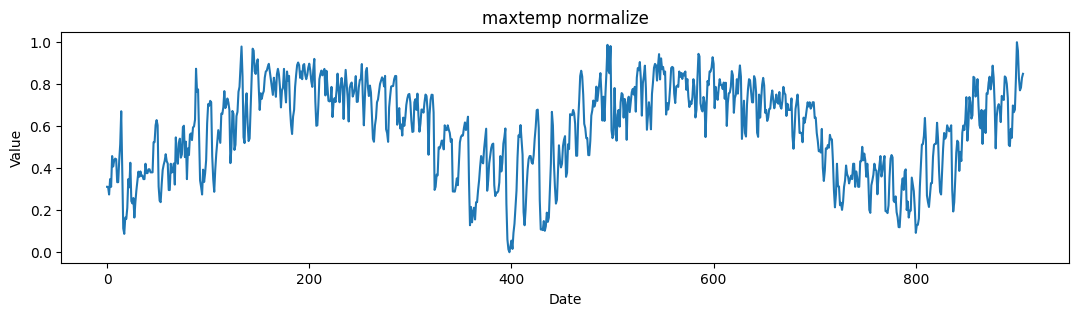

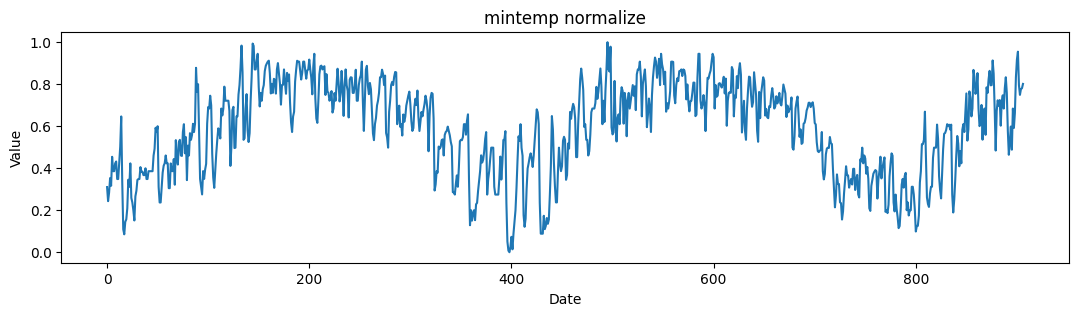

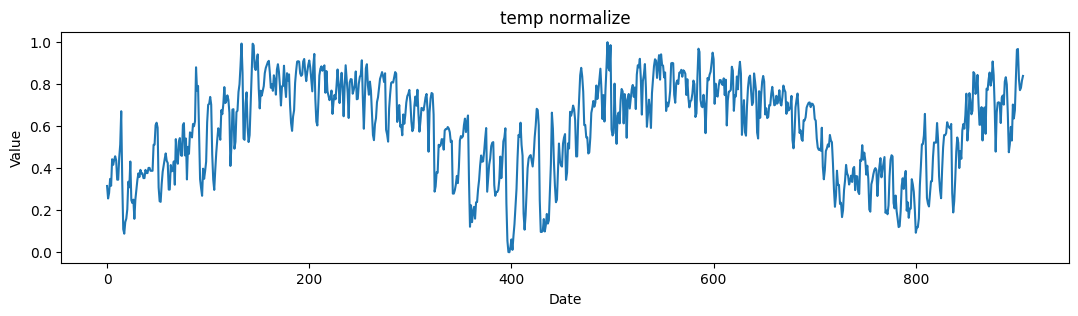

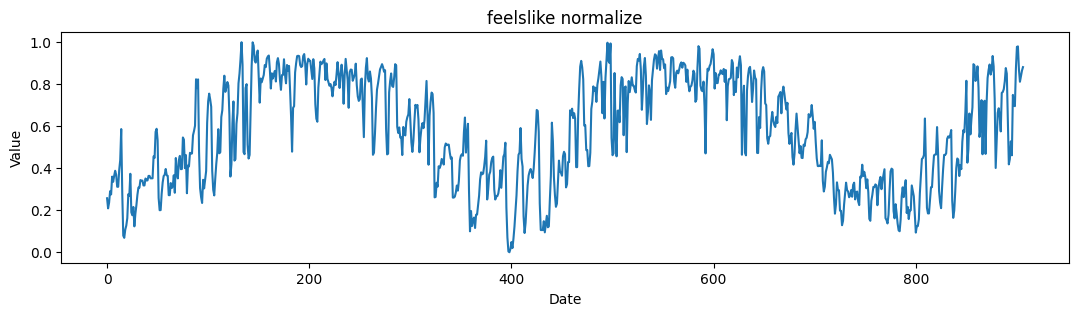

In [16]:
for column in df_normal_maxtemp.columns:
    plt.figure(figsize=(13, 3))
    plt.plot(df_normal_maxtemp[column])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column + ' normalize')
    plt.show()

In [17]:
scaler_mintemp = MinMaxScaler()
scaler_mintemp.fit(prop_mintemp)

normal_mintemp = scaler_mintemp.transform(prop_mintemp)
df_normal_mintemp = pd.DataFrame(normal_mintemp, columns=prop_mintemp.columns)
display(df_normal_mintemp)

,mintemp,temp,maxtemp,feelslike
0,0.310242,0.315494,0.311493,0.256978
1,0.243203,0.255988,0.311493,0.208921
2,0.284544,0.282186,0.274890,0.236259
3,0.353073,0.349177,0.348097,0.290647
4,0.316574,0.316617,0.311493,0.275108
...,...,...,...,...
902,0.795903,0.824476,0.828331,0.869928
903,0.749348,0.771707,0.770864,0.811799
904,0.777281,0.782934,0.783675,0.837986
905,0.780633,0.817740,0.830527,0.864748


In [18]:
import os

directory = "/content/drive/MyDrive/DATN"

file_path = os.path.join(directory, "datanormal_mintemp.csv")

df_normal_mintemp.to_csv(file_path, index=False)
print("Dữ liệu xử lý đã được lưu vào file datanormal_mintemp.csv")

Dữ liệu xử lý đã được lưu vào file datanormal_mintemp.csv


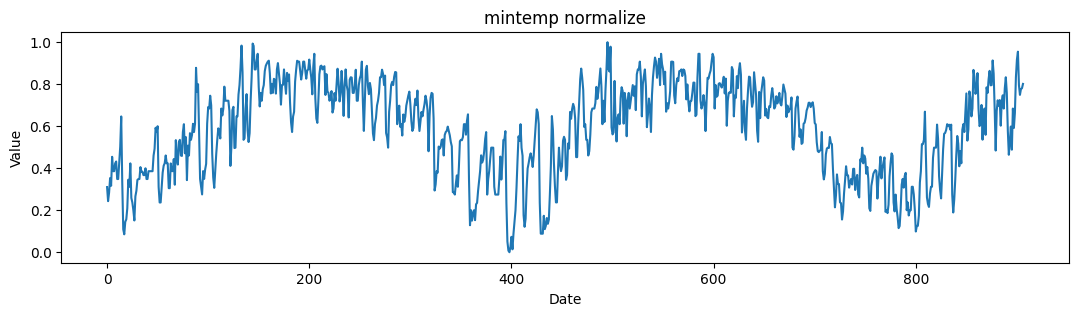

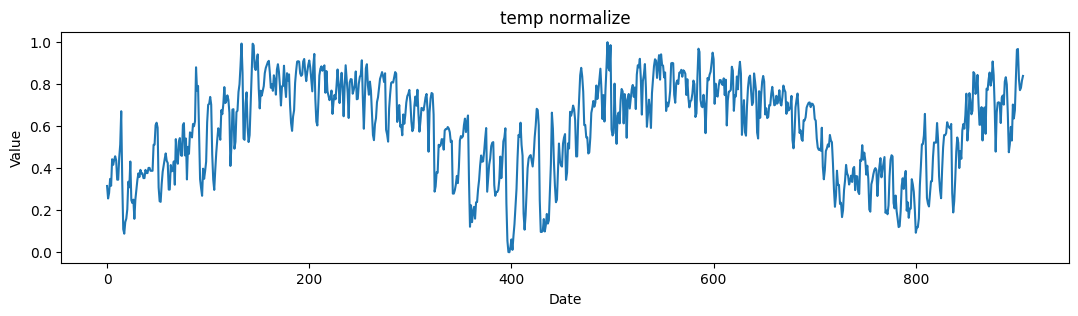

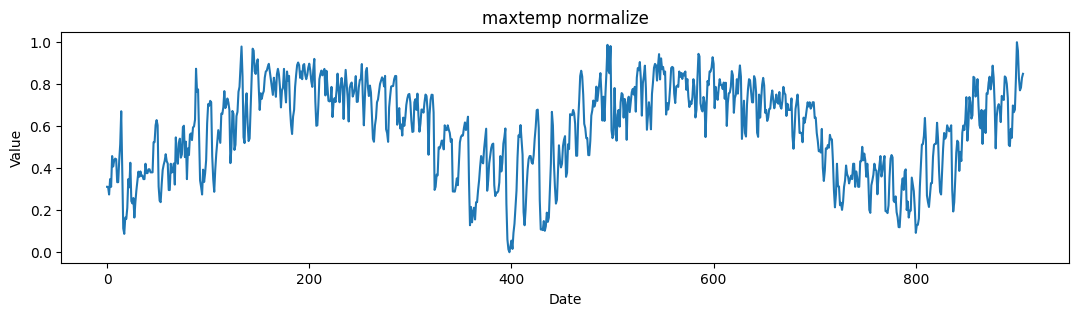

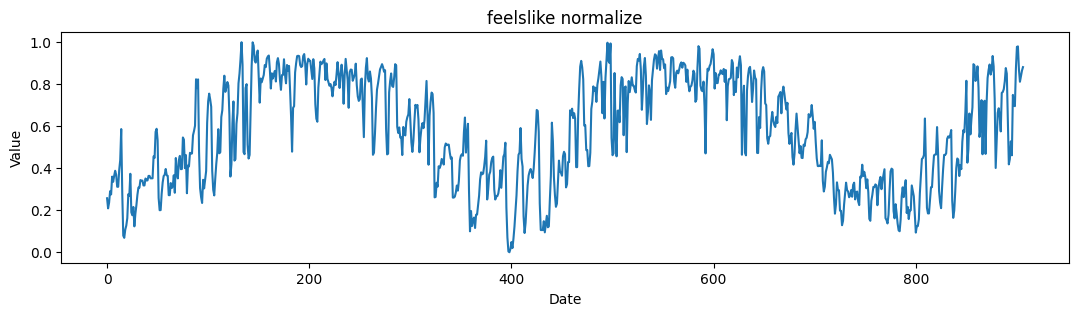

In [19]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho từng cột dữ liệu
for column in df_normal_mintemp.columns:
    plt.figure(figsize=(13, 3))
    plt.plot(df_normal_mintemp[column])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column + ' normalize')
    plt.show()